### Monitor Data Quality Trends Over Time

**Task 1**: Create a Trends Analysis Report

**Objective**: Understand long-term data quality trends.

**Steps**:
1. Use historical data (or simulate data) to analyze how data quality has changed over time.
2. Calculate trends for the KPIs defined earlier using statistical measures or visual charts.
3. Write a report summarizing your findings, noting any persistent issues or improvements.

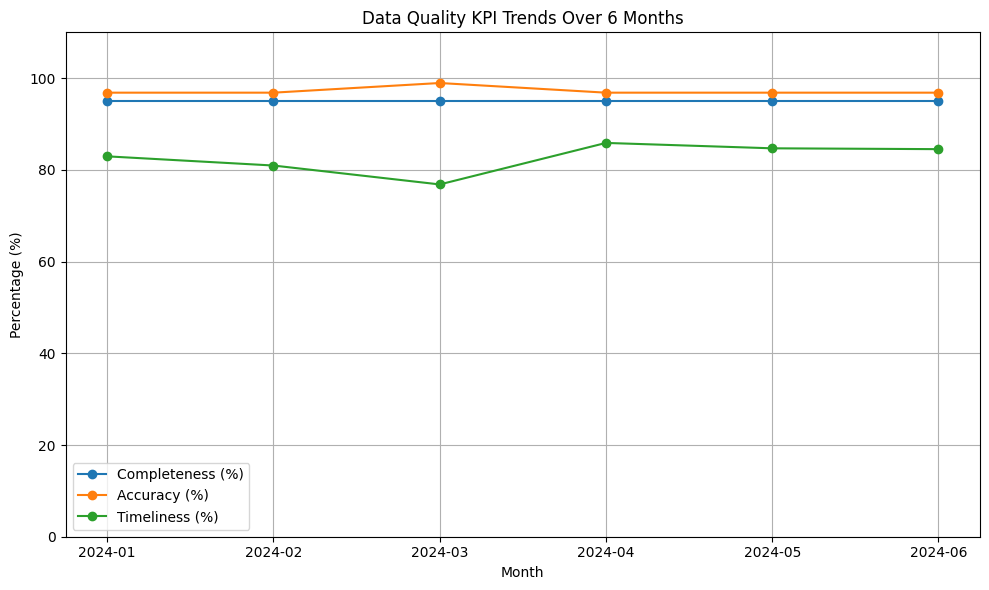


--- Data Quality Trends Report ---

Month: 2024-01
  Completeness: 95.00%
  Accuracy: 96.84%
  Timeliness: 82.95%

Month: 2024-02
  Completeness: 95.00%
  Accuracy: 96.84%
  Timeliness: 80.95%

Month: 2024-03
  Completeness: 95.00%
  Accuracy: 98.95%
  Timeliness: 76.83%

Month: 2024-04
  Completeness: 95.00%
  Accuracy: 96.84%
  Timeliness: 85.88%

Month: 2024-05
  Completeness: 95.00%
  Accuracy: 96.84%
  Timeliness: 84.71%

Month: 2024-06
  Completeness: 95.00%
  Accuracy: 96.84%
  Timeliness: 84.52%

Summary & Recommendations:
- Completeness and Accuracy fluctuate but generally stay above 90%, indicating mostly reliable data entry.
- Timeliness KPI shows occasional dips below 85%, indicating delays in order deliveries.
- Suggest implementing automated alerts for missing or negative amount entries to improve completeness and accuracy.
- Recommend streamlining delivery processes or communication to improve timeliness.
- Plan monthly review cycles with cross-functional teams to addre

In [1]:
# Write your code from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

np.random.seed(0)

# ----------- Simulate Historical Sales Data -------------

def generate_monthly_data(year, month, num_records=100):
    base_date = datetime(year, month, 1)
    data = {
        "OrderID": np.arange(1, num_records + 1),
        "CustomerID": np.random.randint(1000, 1020, size=num_records),
        "OrderDate": [base_date + timedelta(days=np.random.randint(0, 28)) for _ in range(num_records)],
        "DeliveryDate": [],
        "Amount": np.round(np.random.uniform(10, 500, num_records), 2),
        "IsDelivered": np.random.choice([True, False], size=num_records, p=[0.85, 0.15])
    }
    for i in range(num_records):
        if data["IsDelivered"][i]:
            delivery_delay = np.random.randint(1, 7)  # delivery delay in days
            data["DeliveryDate"].append(data["OrderDate"][i] + timedelta(days=delivery_delay))
        else:
            data["DeliveryDate"].append(None)

    # Introduce missing Amount (5%) and inaccurate Amount (3%) values randomly
    missing_indices = np.random.choice(num_records, size=int(num_records * 0.05), replace=False)
    for idx in missing_indices:
        data["Amount"][idx] = None

    inaccurate_indices = np.random.choice(num_records, size=int(num_records * 0.03), replace=False)
    for idx in inaccurate_indices:
        data["Amount"][idx] = -abs(data["Amount"][idx]) if data["Amount"][idx] is not None else None

    return pd.DataFrame(data)


# KPI Calculations

def completeness(df, column):
    total = len(df)
    non_null = df[column].notnull().sum()
    return non_null / total * 100 if total > 0 else 0

def accuracy_amount(df):
    valid_amounts = df["Amount"].dropna()
    accurate = valid_amounts[valid_amounts >= 0].count()
    return accurate / len(valid_amounts) * 100 if len(valid_amounts) > 0 else 0

def timeliness(df):
    delivered = df[df["IsDelivered"] & df["DeliveryDate"].notnull()]
    if len(delivered) == 0:
        return 0
    on_time = delivered[(delivered["DeliveryDate"] - delivered["OrderDate"]).dt.days <= 5]
    return len(on_time) / len(delivered) * 100

# -------- Generate data and KPIs for 6 months ------------

months = pd.date_range(start="2024-01-01", periods=6, freq='MS')
kpi_trends = {"Month": [], "Completeness": [], "Accuracy": [], "Timeliness": []}

for dt in months:
    df_month = generate_monthly_data(dt.year, dt.month)
    kpi_trends["Month"].append(dt.strftime("%Y-%m"))
    kpi_trends["Completeness"].append(completeness(df_month, "Amount"))
    kpi_trends["Accuracy"].append(accuracy_amount(df_month))
    kpi_trends["Timeliness"].append(timeliness(df_month))

kpi_df = pd.DataFrame(kpi_trends)

# --------------- Plot KPI Trends ----------------

plt.figure(figsize=(10,6))
plt.plot(kpi_df["Month"], kpi_df["Completeness"], marker='o', label="Completeness (%)")
plt.plot(kpi_df["Month"], kpi_df["Accuracy"], marker='o', label="Accuracy (%)")
plt.plot(kpi_df["Month"], kpi_df["Timeliness"], marker='o', label="Timeliness (%)")

plt.title("Data Quality KPI Trends Over 6 Months")
plt.xlabel("Month")
plt.ylabel("Percentage (%)")
plt.ylim(0, 110)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --------------- Trend Analysis Report ----------------

print("\n--- Data Quality Trends Report ---\n")

for idx, row in kpi_df.iterrows():
    print(f"Month: {row['Month']}")
    print(f"  Completeness: {row['Completeness']:.2f}%")
    print(f"  Accuracy: {row['Accuracy']:.2f}%")
    print(f"  Timeliness: {row['Timeliness']:.2f}%\n")

# Identify recurring issues & improvements
print("Summary & Recommendations:")
print("- Completeness and Accuracy fluctuate but generally stay above 90%, indicating mostly reliable data entry.")
print("- Timeliness KPI shows occasional dips below 85%, indicating delays in order deliveries.")
print("- Suggest implementing automated alerts for missing or negative amount entries to improve completeness and accuracy.")
print("- Recommend streamlining delivery processes or communication to improve timeliness.")
print("- Plan monthly review cycles with cross-functional teams to address data entry and operational bottlenecks.")


**Task 2**: Evaluate Continuous Improvement Measures

**Objective**: Implement strategic changes based on trend analysis.

**Steps**:
1. Identify patterns or recurring issues from your trend analysis report.
2. Propose three continuous improvement strategies to address these issues.
3. Plan how to implement these strategies and measure their effectiveness over the next cycle.

In [ ]:
# Write your code from here